Import libraries

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.tree import export_graphviz
import graphviz

In [2]:
df = pd.read_csv('../Student_performance_data.csv')
df.drop(columns='StudentID', inplace=True)

In [3]:
targetColumn = df['GradeClass']
otherColumns = df.drop(columns=targetColumn.name)

xTrain, xTest, yTrain, yTest = train_test_split(otherColumns, targetColumn, test_size=0.2)

Train the model

In [ ]:
rf = RandomForestClassifier(random_state=1)
searchSpace = {
    'max_depth': Integer(2, 6),
    'ccp_alpha': Real(0.0, 10.0),
    'n_estimators': Integer(10, 1000),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(2, 10),
}
rf = BayesSearchCV(estimator=rf, search_spaces=searchSpace, n_iter=5, cv=5, random_state=1)
rf.fit(xTrain, yTrain)

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_iter=20,
              random_state=1,
              search_spaces={'ccp_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=2, high=6, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=1000, prior='uniform', transform='normalize')})

In [ ]:
rf.score(xTest, yTest)

0.9144050104384134

In [15]:
rf.best_estimator_

RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=8,
                       random_state=1)

Make the tree

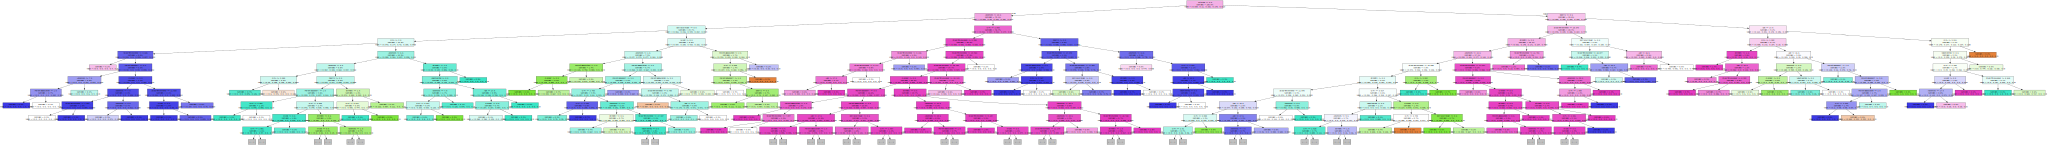

In [19]:
dot_data = export_graphviz(rf.best_estimator_[1],
                           feature_names=xTrain.columns,  
                           filled=True,  
                           max_depth=10, 
                           impurity=False, 
                           proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

Predict

In [55]:
x = 100
print(df['GradeClass'].loc[x])
# print(xTest.info())
rf.predict(otherColumns.loc[[x]])

4.0


array([4.])